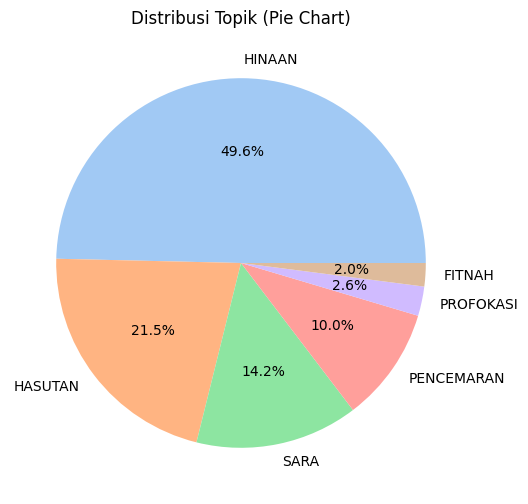

<ipython-input-1-e3e3d267676a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


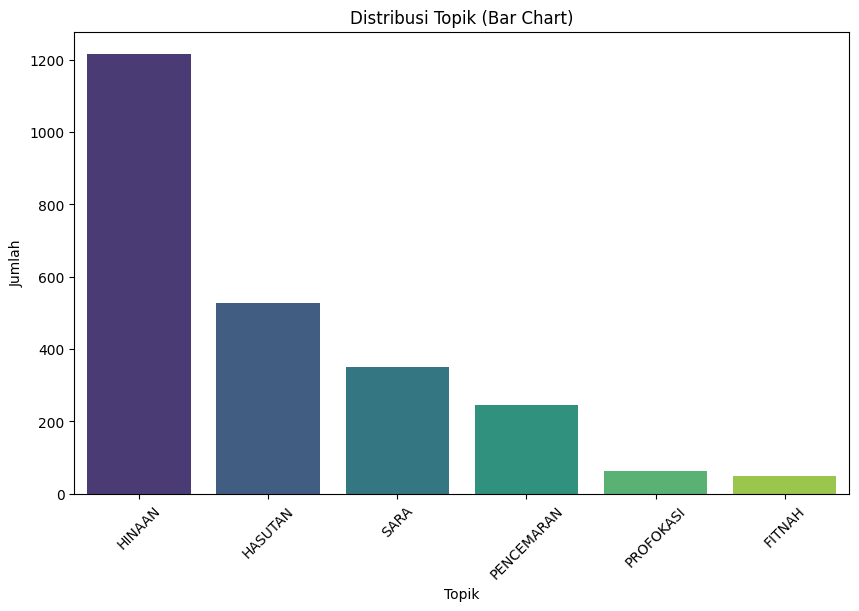

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nama file CSV
file_csv = "Final.csv"  # Ganti dengan nama file yang sesuai

# Membaca file CSV
df = pd.read_csv(file_csv)

# Menghitung jumlah tiap topik
topic_counts = df['label'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribusi Topik (Pie Chart)")
plt.show()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.xlabel("Topik")
plt.ylabel("Jumlah")
plt.title("Distribusi Topik (Bar Chart)")
plt.xticks(rotation=45)  # Memutar label agar lebih terbaca
plt.show()


In [ ]:
"""
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
"""

In [19]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('data_skripsi.csv')

# Filter data berdasarkan label yang bukan 'NETRAL'
filtered_data = df[df['label'] != 'NETRAL']

# Ambil semua data dari kolom 'full_text' yang sudah difilter
full_text_data = filtered_data['cleaned_text']

# Simpan data 'full_text' yang telah difilter ke dalam file CSV baru
full_text_data.to_csv('tahap 0.csv', index=False, header=['cleaned_text'])

print("Data berhasil dipindahkan ke file tahap_1_filtered.csv")


Data berhasil dipindahkan ke file tahap_1_filtered.csv


In [21]:
# mengambil data Full_Text
import pandas as pd

# Baca file CSV comment1.csv
df = pd.read_csv('tahap 0.csv')

# Ambil semua data dari kolom 'full_text'
full_text_data = df['cleaned_text']

# Simpan data 'full_text' ke dalam file CSV baru
full_text_data.to_csv('tahap 1.csv', index=False, header=['cleaned_text'])

print("Data  berhasil dipindahkan ")

Data  berhasil dipindahkan 


In [23]:
# Menghapus Simbol
import pandas as pd
import re

# Baca file CSV
df = pd.read_csv('tahap 1.csv')

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):  # Pastikan input adalah string
        # Hapus teks yang dimulai dengan "@"
        text = re.sub(r'@\w+', '', text)
        # Hapus tagar
        text = re.sub(r'#\w+', '', text)
        # Hapus link
        text = re.sub(r'http\S+', '', text)
        # Hapus angka
        text = re.sub(r'\d+', '', text)
        # Hapus simbol (selain spasi dan alfanumerik)
        text = re.sub(r'[^\w\s]', '', text)
        # Hapus spasi berlebih
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = ''
    return text

# Terapkan fungsi clean_text ke kolom 'text'
df['cleaned_text2'] = df['cleaned_text'].apply(clean_text)

# Simpan hasilnya kembali ke file CSV
df.to_csv('tahap_2.csv', index=False)

print("Proses pembersihan teks selesai dan hasilnya disimpan di tahap_2.csv")


Proses pembersihan teks selesai dan hasilnya disimpan di tahap_2.csv


In [24]:
# Case Folding
import pandas as pd

# Baca file CSV dari tahap sebelumnya
df = pd.read_csv('tahap_2.csv')

# Pastikan kolom 'cleaned_text' ada dan ubah teks ke huruf kecil
if 'cleaned_text2' in df.columns:
    df['lower_text'] = df['cleaned_text2'].apply(lambda x: x.lower() if isinstance(x, str) else '')
else:
    raise KeyError("Kolom 'cleaned_text2' tidak ditemukan dalam data. Pastikan file tahap_2.csv benar.")

# Simpan hasilnya kembali ke file CSV
df.to_csv("tahap_3.csv", index=False)

print("Proses pengubahan teks ke huruf kecil selesai dan hasilnya disimpan di tahap_3.csv")



Proses pengubahan teks ke huruf kecil selesai dan hasilnya disimpan di tahap_3.csv


In [25]:
# Tokenisasi
import pandas as pd

# Baca file CSV dari tahap sebelumnya
df = pd.read_csv('tahap_3.csv')

# Pastikan kolom 'lower_text' ada dan memecah teks menjadi token
if 'lower_text' in df.columns:
    df['tokens'] = df['lower_text'].apply(lambda x: x.split() if isinstance(x, str) else [])
else:
    raise KeyError("Kolom 'lower_text' tidak ditemukan dalam data. Pastikan file tahap_3.csv benar.")

# Simpan hasilnya kembali ke file CSV
df.to_csv("tahap_4.csv", index=False)

print("Proses tokenisasi selesai dan hasilnya disimpan di tahap_4.csv")



Proses tokenisasi selesai dan hasilnya disimpan di tahap_4.csv


In [26]:
# Penghapusan Stop Word
import pandas as pd

# Baca file CSV dari tahap sebelumnya
df = pd.read_csv('tahap_4.csv')

# Baca daftar stopword dari file CSV
try:
    stopwords = pd.read_csv("stopwordbahasa_final.csv", header=None, names=["stopword"])["stopword"].tolist()
except FileNotFoundError:
    raise FileNotFoundError("File stopwordbahasa.csv tidak ditemukan. Pastikan file tersedia di direktori yang benar.")

# Pastikan kolom 'tokens' ada dan menghapus stopword dari token
if 'tokens' in df.columns:
    df['filtered_tokens'] = df['tokens'].apply(
        lambda tokens: [word for word in eval(tokens) if word not in stopwords] if isinstance(tokens, str) else []
    )
else:
    raise KeyError("Kolom 'tokens' tidak ditemukan dalam data. Pastikan file tahap_4.csv benar.")

# Simpan hasilnya kembali ke file CSV
df.to_csv("tahap_5.csv", index=False)

print("Proses penghapusan stopword selesai dan hasilnya disimpan di tahap_5.csv")


Proses penghapusan stopword selesai dan hasilnya disimpan di tahap_5.csv


In [27]:
import pandas as pd

# Baca file CSV dari tahap sebelumnya
df = pd.read_csv('tahap_5.csv')

# Pastikan kolom 'filtered_tokens' ada dan gabungkan kembali token menjadi satu kalimat
if 'filtered_tokens' in df.columns:
    df['cleaned_sentence'] = df['filtered_tokens'].apply(
        lambda tokens: ' '.join(eval(tokens)) if isinstance(tokens, str) else ''
    )
else:
    raise KeyError("Kolom 'filtered_tokens' tidak ditemukan dalam data. Pastikan file tahap_5.csv benar.")

# Simpan hasilnya kembali ke file CSV
df.to_csv("tahap_6.csv", index=False)

print("Proses penggabungan token selesai dan hasilnya disimpan di tahap_6.csv")


Proses penggabungan token selesai dan hasilnya disimpan di tahap_6.csv


In [28]:
# Penggabungan kata menjadi kalimat
#ekstrak kalimat akhir
import pandas as pd

# Baca file CSV comment1.csv
df = pd.read_csv('tahap_6.csv')

# Ambil semua data dari kolom 'full_text'
full_text_data = df['cleaned_sentence']

# Simpan data 'full_text' ke dalam file CSV baru comment2.csv
full_text_data.to_csv('tahap_7.csv', index=False, header=['cleaned_text'])

print("Data  berhasil dipindahkan ")

Data  berhasil dipindahkan 


In [ ]:
"""
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
######################################################################
"""

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Membaca data CSV
df = pd.read_csv('Final.csv')  # Ganti dengan path file Anda

# Memisahkan fitur dan label
X = df['cleaned_text']
y = df['label']

# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan TF-IDF untuk mengonversi teks menjadi fitur numerik
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Melatih model menggunakan Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Membuat prediksi
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8065173116089613
Classification Report:
              precision    recall  f1-score   support

      FITNAH       0.00      0.00      0.00        10
     HASUTAN       0.92      0.90      0.91       120
      HINAAN       0.75      0.94      0.83       234
  PENCEMARAN       0.93      0.53      0.68        47
   PROFOKASI       1.00      0.08      0.15        12
        SARA       0.81      0.62      0.70        68

    accuracy                           0.81       491
   macro avg       0.73      0.51      0.55       491
weighted avg       0.81      0.81      0.79       491



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# prompt: tampilkan model summary

model


LogisticRegression(max_iter=1000)

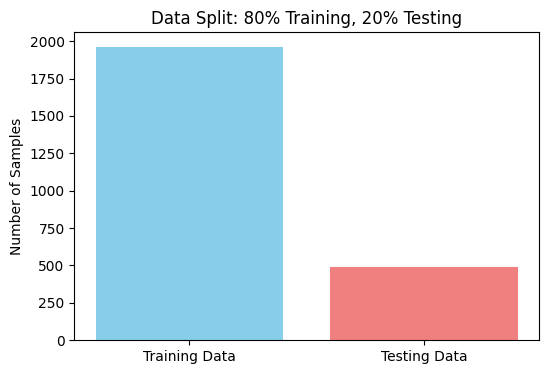

In [12]:
# prompt: tampilkan pembagian data 80% 20% dalam barchart

import matplotlib.pyplot as plt

# Data untuk bar chart
categories = ['Training Data', 'Testing Data']
values = [len(X_train), len(X_test)]

# Membuat bar chart
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['skyblue', 'lightcoral'])
plt.title('Data Split: 80% Training, 20% Testing')
plt.ylabel('Number of Samples')
plt.show()


In [13]:

# Menampilkan fitur-fitur terpenting dari model TF-IDF
feature_names = tfidf.get_feature_names_out()
feature_importances = model.coef_

# Misalnya, kita ingin menampilkan 10 fitur terpenting untuk setiap kelas
for class_idx, class_name in enumerate(model.classes_):
    top_features = sorted(zip(feature_names, feature_importances[class_idx]), key=lambda x: x[1], reverse=True)[:10]
    print(f"Top 10 features for class {class_name}:")
    for feature, importance in top_features:
        print(f"- {feature}: {importance}")
    print()


Top 10 features for class FITNAH:
- fitnah: 3.019762564609305
- hoax: 2.4009705356911333
- palsu: 2.0805617870784743
- ijazah: 1.4022390621853278
- manipulasi: 1.1837199022571057
- silvy: 0.9821545117420067
- bohong: 0.9070978519513675
- tq: 0.6441693881549636
- idefol: 0.5952464878937124
- laia: 0.5952464878937124

Top 10 features for class HASUTAN:
- korupsi: 10.301521414735882
- basmi: 1.2127353116326127
- kpk: 1.0784640122994125
- pejabat: 1.0256530614039496
- negara: 1.0092355517361844
- agung: 0.9562806477313223
- dugaan: 0.8924400843857787
- jaksa: 0.8552874517314523
- laut: 0.821190900824402
- pagar: 0.8023862753058033

Top 10 features for class HINAAN:
- tolol: 4.606622617266712
- ajg: 3.2546263824547874
- bego: 3.1816819835965453
- goblok: 2.7233216967413894
- anjing: 2.7150193082172036
- bajingan: 2.5461739200769875
- bodoh: 2.408486761330816
- rezim: 2.4033990875101727
- babi: 2.249409144527539
- dungu: 2.0704998558640644

Top 10 features for class PENCEMARAN:
- koruptor: 7

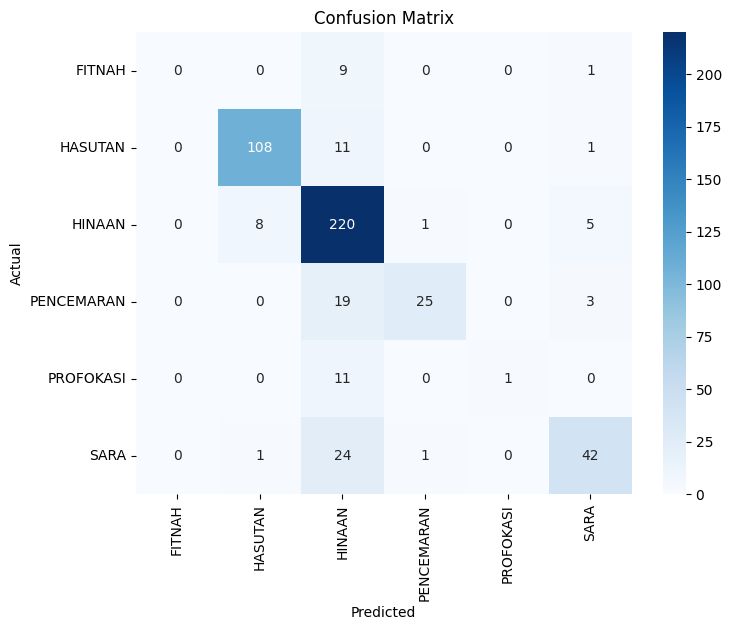

In [14]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
import joblib

# Menyimpan model Logistic Regression
joblib.dump(model, 'model_logistic_regression.pkl')

# Menyimpan TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model dan TF-IDF telah disimpan.")


Model dan TF-IDF telah disimpan.
